<a href="https://colab.research.google.com/github/R3gm/InsightSolver-Colab/blob/main/SD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion 3 (SD3)

Test SD3

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Repository | [![GitHub Repository](https://img.shields.io/github/stars/Stability-AI/generative-models?style=social)](https://github.com/Stability-AI/generative-models) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |

In [ ]:
!pip install -q git+https://github.com/huggingface/diffusers.git@sd3 git+https://github.com/huggingface/transformers bitsandbytes accelerate sentencepiece peft

One important step is to accept the license agreement for using SD3. You need to have an account on Hugging Face and `accept the license to use the models`: https://huggingface.co/stabilityai/stable-diffusion-3-medium




Get your KEY TOKEN here: https://hf.co/settings/tokens "type: read"

In [ ]:
YOUR_HF_TOKEN = "" #@param {type:"string"}

In [ ]:
from huggingface_hub import snapshot_download

model_path = snapshot_download(
    repo_id="stabilityai/stable-diffusion-3-medium",
    revision="refs/pr/26",
    repo_type="model",
    ignore_patterns=["demo_images/*.png", "*.md", "*..gitattributes", "sd3_medium.safetensors", "sd3_medium_incl_clips.safetensors", "sd3_medium_incl_clips_t5xxlfp8.safetensors", "text_encoders/clip_g.safetensors", "text_encoders/clip_l.safetensors", "text_encoders/t5xxl_fp16.safetensors", "text_encoders/t5xxl_fp8_e4m3fn.safetensors"],
    local_dir="stable-diffusion-3-medium",
    token=YOUR_HF_TOKEN,
    )

In [3]:
import torch
from diffusers import StableDiffusion3Pipeline
from transformers import T5EncoderModel, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_8bit=True)

text_encoder = T5EncoderModel.from_pretrained(
    model_path,
    subfolder="text_encoder_3",
    quantization_config=quantization_config,
)
pipe = StableDiffusion3Pipeline.from_pretrained(
    model_path,
    text_encoder_3=text_encoder,
    device_map="balanced",
    torch_dtype=torch.float16
)

image = pipe(
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

image.save("sd3_hello_world-8bit-T5.png")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/28 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


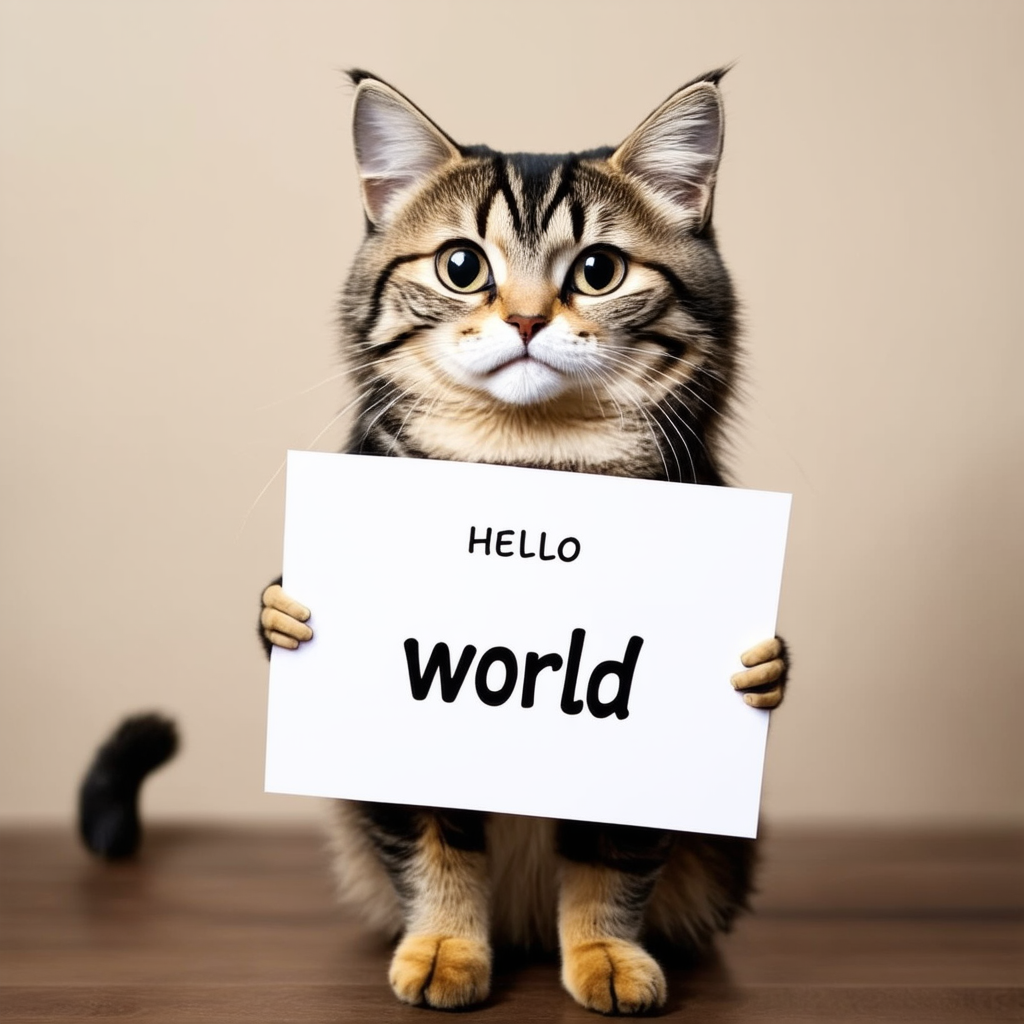

In [4]:
image

### A prompt for each text encoder

  0%|          | 0/28 [00:00<?, ?it/s]

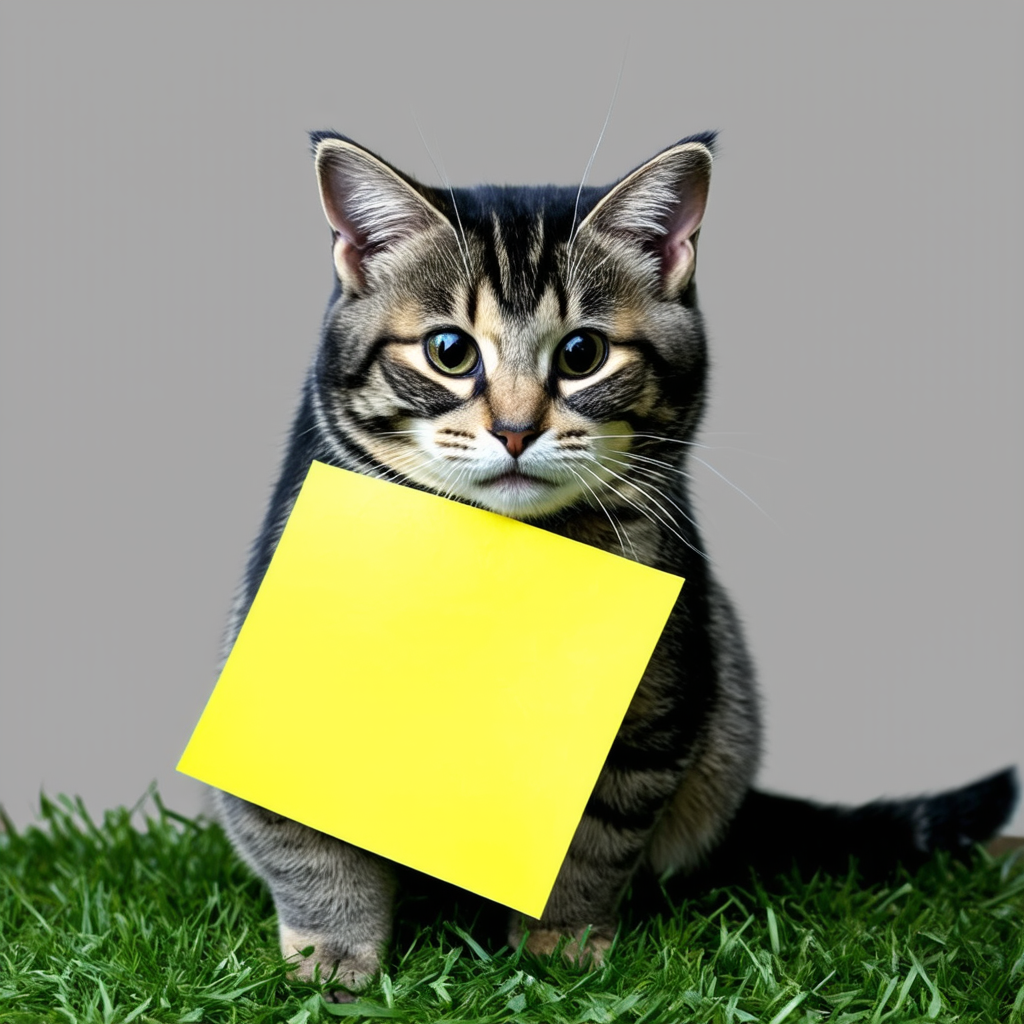

In [9]:
image = pipe(
    prompt="a photo of a cat holding a sign that says hello world",
    prompt_2="cat",
    prompt_3="grass",
    negative_prompt="table",
    negative_prompt_2="white",
    negative_prompt_3="day",
    num_inference_steps=28,
    height=1024,
    width=1024,
    guidance_scale=7.0,
    clip_skip=2,

).images[0]

image